In [1]:
import matplotlib.pyplot as plt
import numpy as np 

from scipy.ndimage import shift 
from scipy.fft import ifft, fft
from scipy.signal import freqs, iirfilter, square

In [2]:
def cuadrada(senial):
    y = []
    for signal in senial:
        if signal == 1:
            valor_cuad = 1
        else:
            valor_cuad = 0
        y.append(valor_cuad)
    y = np.array(y)
    return(y)

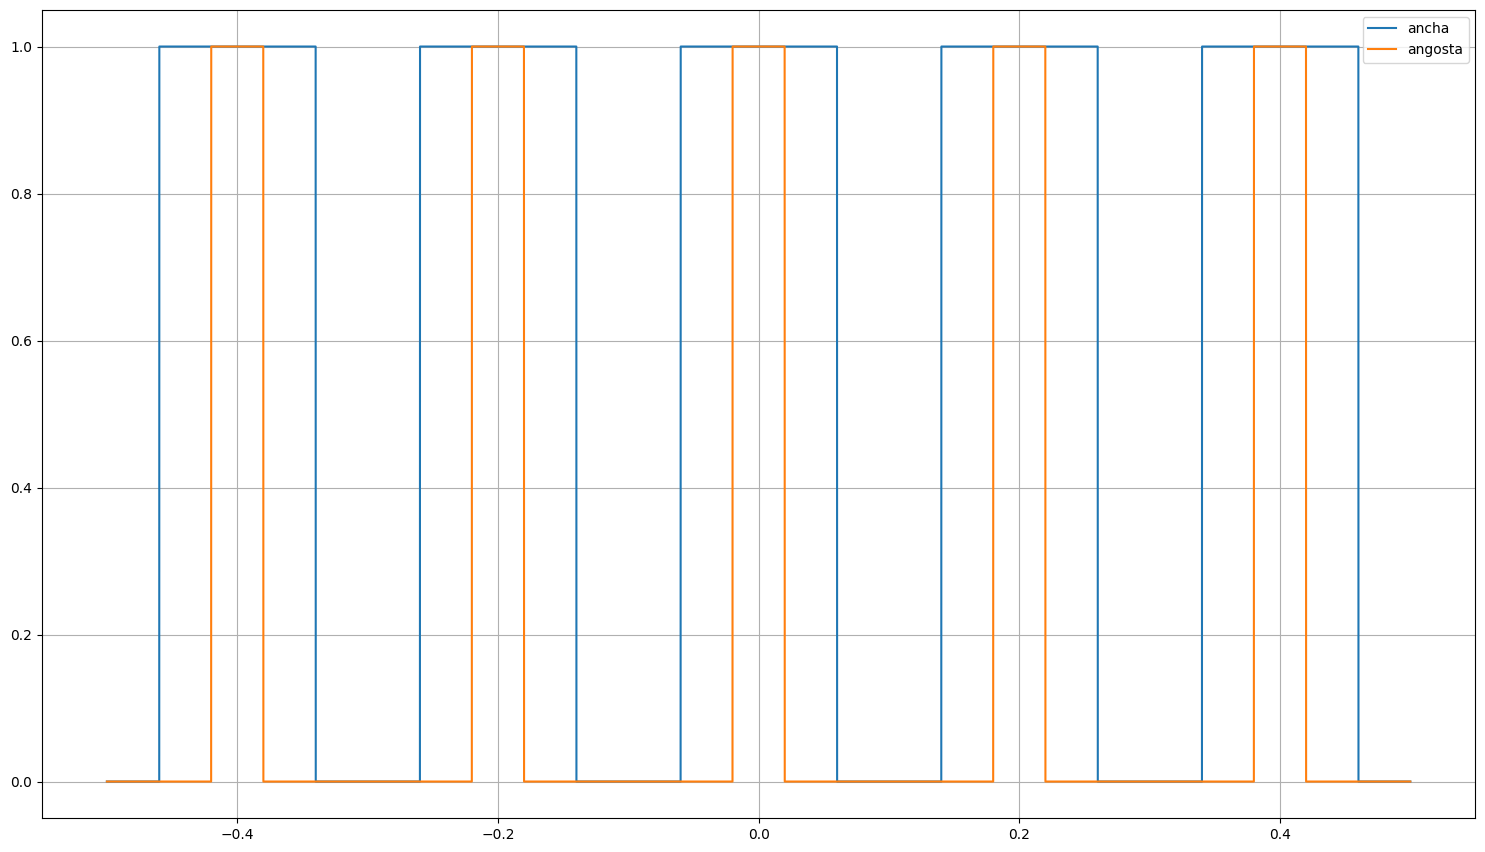

In [26]:
frec = 200 #Hz
fs = 10000
ciclos_cuad = 100
puntos_por_ciclos = 10000

vector_temp = np.linspace(start=-0.5,stop=ciclos_cuad*(1/frec), num=int(puntos_por_ciclos * ciclos_cuad))

senial_cuad1 = square(2 * np.pi * 5 * vector_temp + 1.88,duty=0.60)
senial_cuad2 = square(2 * np.pi * 5 * vector_temp + 0.629,duty=0.2)


fig = plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.plot(vector_temp, cuadrada(senial_cuad1),label ="ancha")
plt.plot(vector_temp, cuadrada(senial_cuad2),label = "angosta")
plt.legend()
plt.grid()
plt.show()

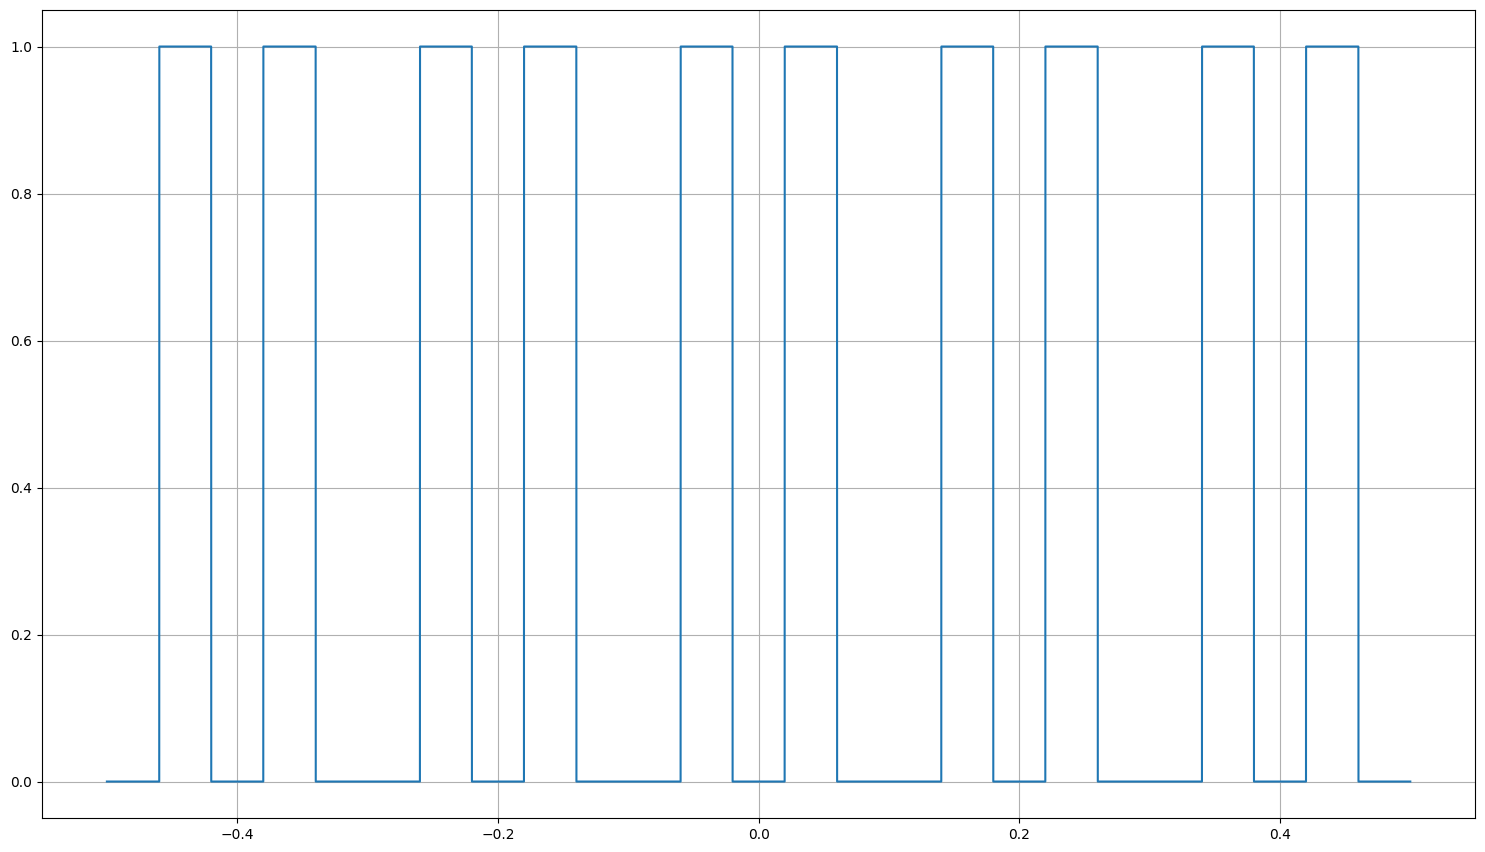

In [30]:
senial =  senial_cuad1 - senial_cuad2

senial_cuad3 = []
for signal in senial:
    if signal == 2:
            valor_cuad = 1
    else:
        valor_cuad = 0
    senial_cuad3.append(valor_cuad)
senial_cuad3 = np.array(senial_cuad3)

fig = plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.plot(vector_temp, senial_cuad3)
plt.grid()
plt.show()

In [5]:
def FFT(y,dt):
    # Realiza la FFT de la señal y
    # array(complex) FFT(array complex y, int n, float t)
    # Entradas:
    #          y: vector de longitud N (array D)
    #          dt: intervalo de muestreo de la señal y
    # Salida:
    #          Y: resultado de FFT de y (array D)
    #          frec: frecuencia asociadoas a FFT(y)
    
    n = len (y)
    Y = np.fft.fft(y) #normalizada
    Y = Y/n
    frec = np.fft.fftfreq(n,dt)
    return Y, frec

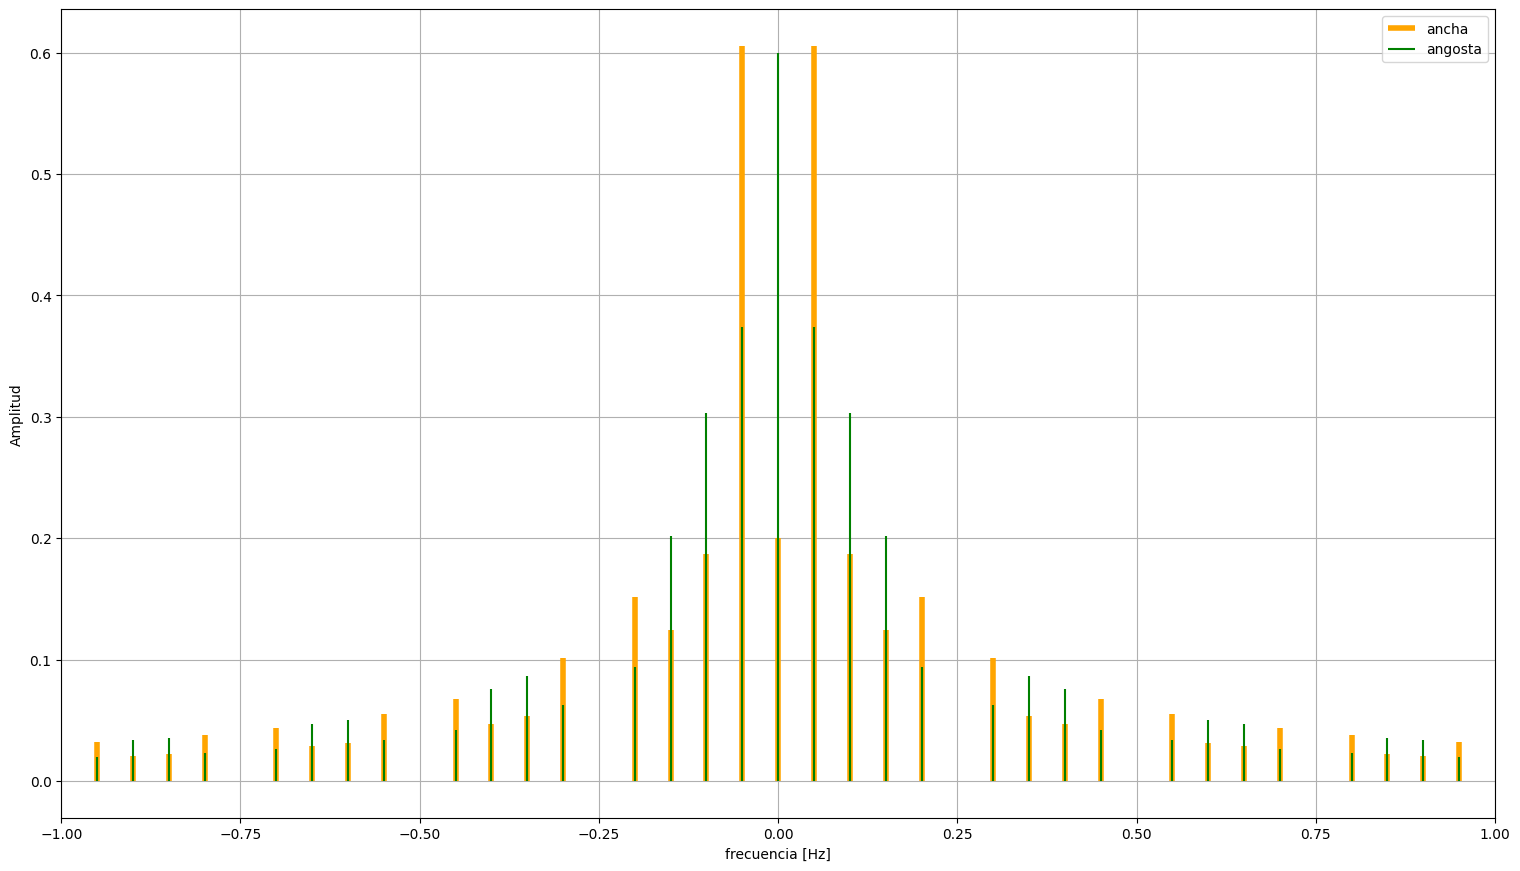

In [27]:
fft_cuad1, freq_cuad1 = FFT(senial_cuad1,1/fs)

fft_cuad2, freq_cuad2 = FFT(senial_cuad2,1/fs)

fig = plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.vlines(freq_cuad1,0,np.abs(fft_cuad1),"orange",label = "ancha", lw = 4)
plt.vlines(freq_cuad2,0,np.abs(fft_cuad2),"green",label = "angosta")
plt.legend()
plt.ylabel("Amplitud")
plt.xlabel("frecuencia [Hz]")
plt.xlim(-1,1)
plt.grid()
plt.show()

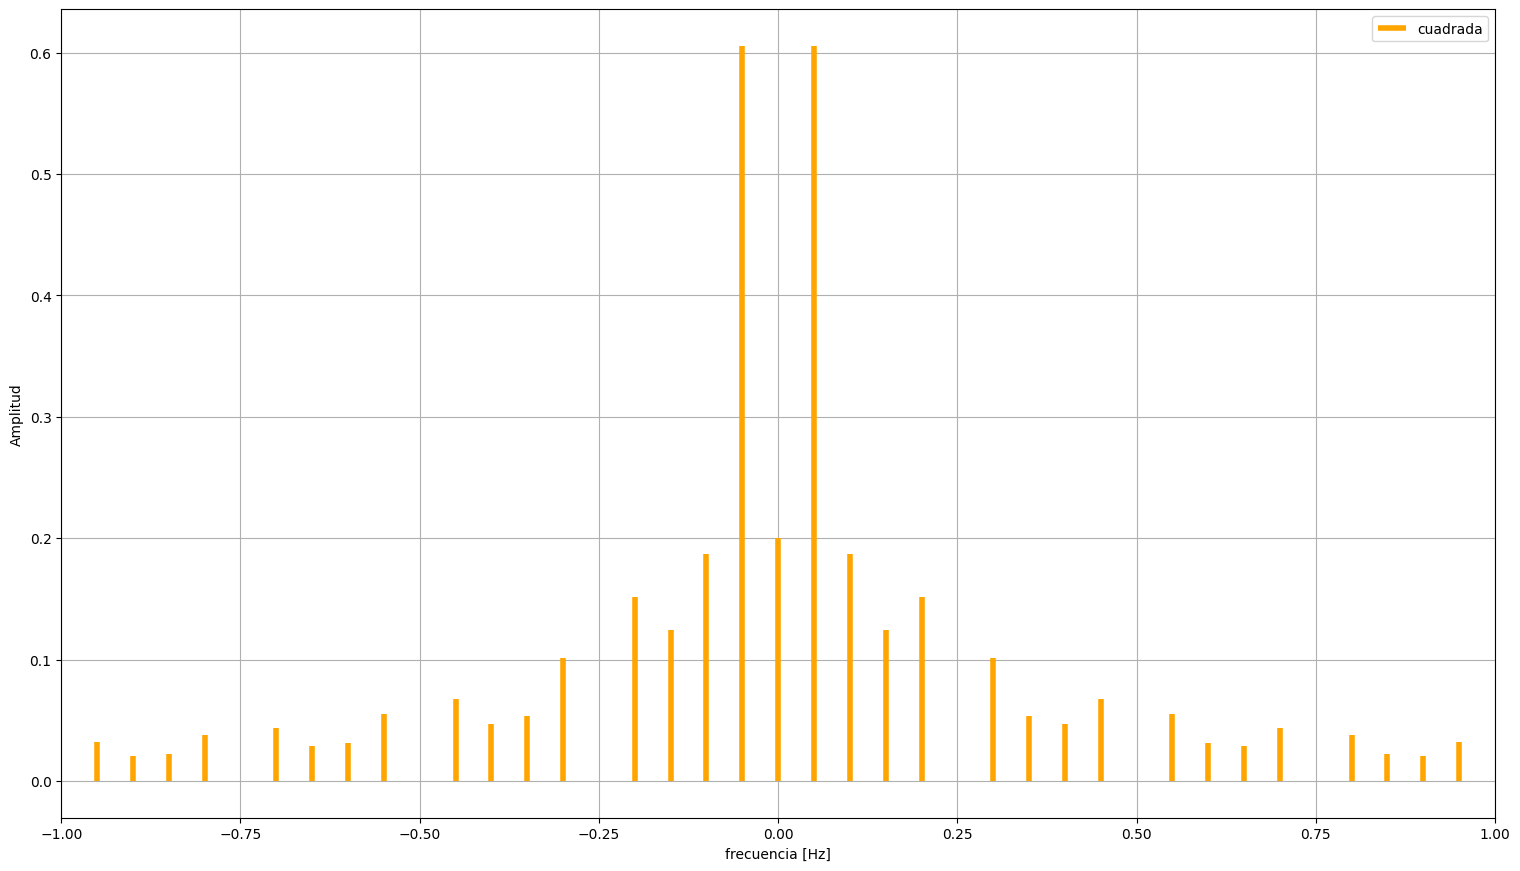

In [31]:
fft_cuad3, freq_cuad3 = FFT(senial_cuad3,1/fs)

fig = plt.gcf()
fig.set_size_inches(18.5,10.5)
#plt.plot(freq_cuad1,np.abs(fft_cuad1),"orange",label = "cuadrada 1")
plt.vlines(freq_cuad3,0,np.abs(fft_cuad1),"orange",label = "cuadrada", lw = 4)
plt.legend()
plt.ylabel("Amplitud")
plt.xlabel("frecuencia [Hz]")
plt.xlim(-1,1)
plt.grid()
plt.show()

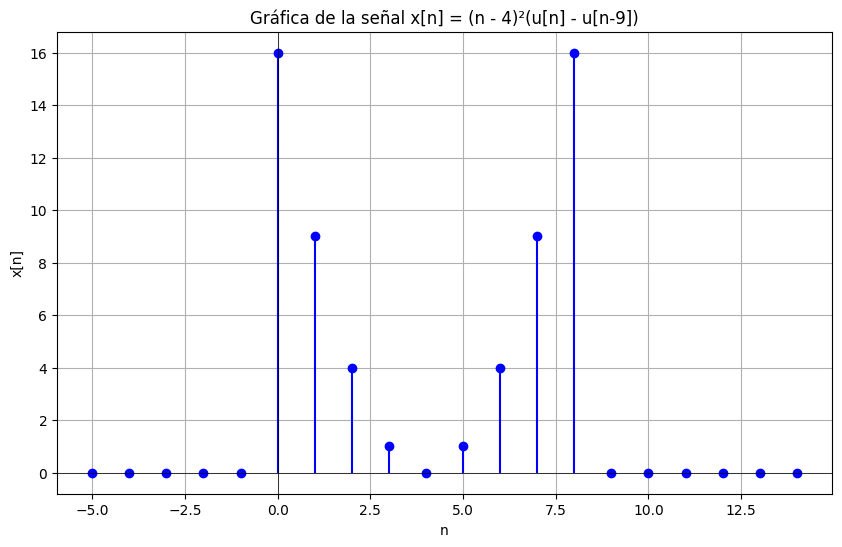

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def u(n):
    return np.heaviside(n, 1)

def x(n):
    return (n - 4)**2 * (u(n) - u(n-9))

n = np.arange(-5, 15)  # Rango de n desde -5 hasta 14
x_n = x(n)

plt.figure(figsize=(10, 6))
plt.stem(n, x_n, basefmt=" ", linefmt="b-", markerfmt="bo")
plt.title("Gráfica de la señal x[n] = (n - 4)²(u[n] - u[n-9])")
plt.xlabel("n")
plt.ylabel("x[n]")
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.axvline(x=0, color='k', linestyle='-', linewidth=0.5)
plt.show()

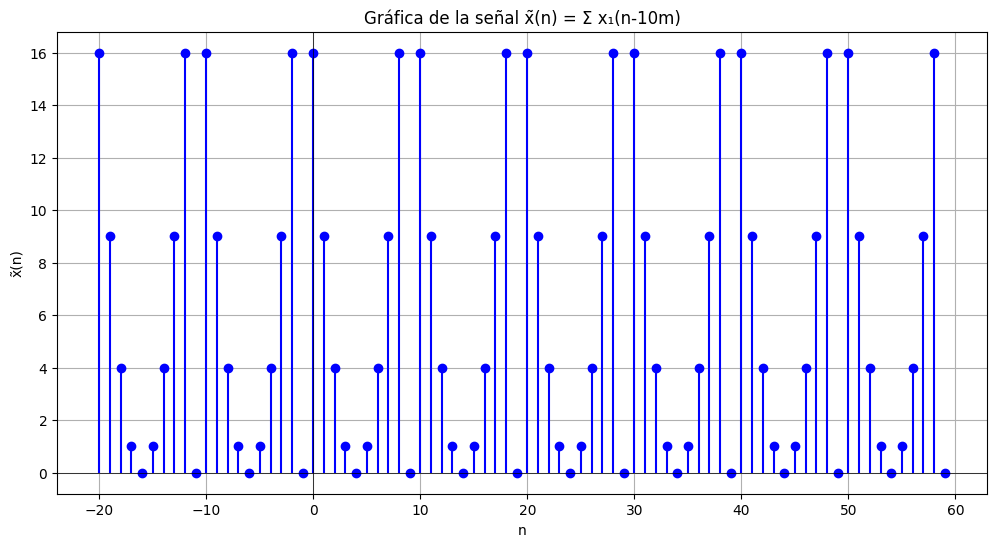

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def u(n):
    return np.heaviside(n, 1)

def x1(n):
    return (n - 4)**2 * (u(n) - u(n-9))

def x_tilde(n):
    result = np.zeros_like(n, dtype=float)
    for m in range(-5, 6):  # Limitamos la suma a un rango razonable
        result += x1(n - 10*m)
    return result

n = np.arange(-20, 60)  # Ampliamos el rango para ver más períodos
x_tilde_n = x_tilde(n)

plt.figure(figsize=(12, 6))
plt.stem(n, x_tilde_n, basefmt=" ", linefmt="b-", markerfmt="bo")
plt.title("Gráfica de la señal x̃(n) = Σ x₁(n-10m)")
plt.xlabel("n")
plt.ylabel("x̃(n)")
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.axvline(x=0, color='k', linestyle='-', linewidth=0.5)
plt.show()

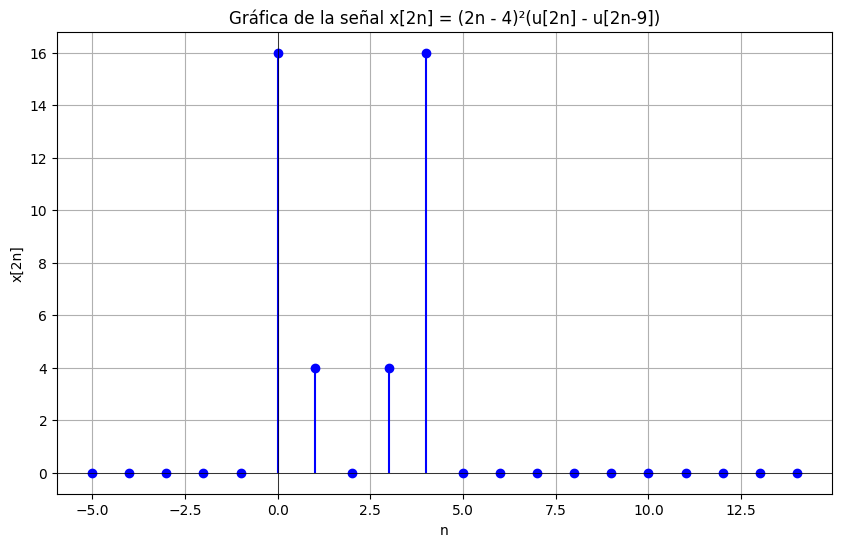

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def u(n):
    return np.heaviside(n, 1)

def x(n):
    return (2*n - 4)**2 * (u(2*n) - u(2*n-9))

n = np.arange(-5, 15)  # Mantenemos el mismo rango de n
x_n = x(n)

plt.figure(figsize=(10, 6))
plt.stem(n, x_n, basefmt=" ", linefmt="b-", markerfmt="bo")
plt.title("Gráfica de la señal x[2n] = (2n - 4)²(u[2n] - u[2n-9])")
plt.xlabel("n")
plt.ylabel("x[2n]")
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.axvline(x=0, color='k', linestyle='-', linewidth=0.5)
plt.show()